In [1]:
import os, numpy as np, matplotlib.pyplot as plt, pickle, pandas as pd
import torch
from utils import *

## Visualizing Loss Curves for AWS training.

In [4]:
path = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/src/99_ModelLogs/12-12-2023-DiagModel-600SeqLen/'
losses = []
loss_names = []
for file in os.listdir(path):
    if 'loss' in file:
        with open(path+file, 'rb') as f:
            losses.append(pickle.load(f))
        loss_names.append(file.split('.')[0])

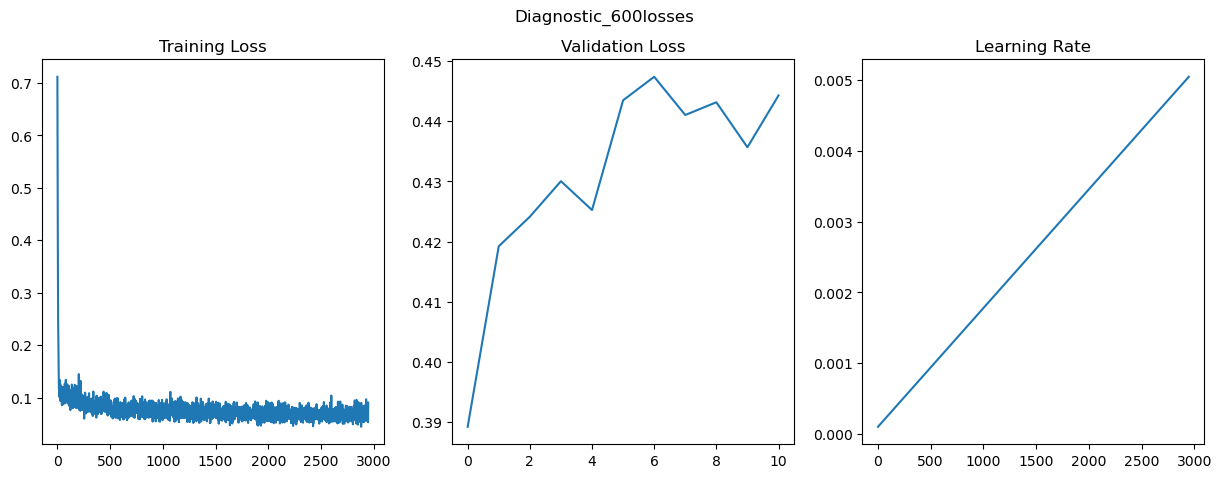

In [5]:
for i in range(len(losses)):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].plot(losses[i][0])
    axes[0].set_title('Training Loss')
    axes[1].plot(torch.tensor(losses[i][1]).cpu().numpy())
    axes[1].set_title('Validation Loss')
    axes[2].plot(losses[i][2])
    axes[2].set_title('Learning Rate')
    fig.suptitle(loss_names[i])
    plt.show()

## Data Loading from Utils

In [2]:
data_folder = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
data, raw_labels = load_dataset(data_folder, 100)

In [3]:
tasks = ['diagnostic', 'subdiagnostic', 'superdiagnostic', 'form', 'rhythm']
task_labels = []
for task in tasks:
    task_labels.append(compute_label_aggregations(raw_labels, folder= data_folder, ctype=task))

In [4]:
outputfolder = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/src/data/01_12-12-2023/'
experiment_name = 'Plain'
if not os.path.exists(outputfolder+experiment_name):
            os.makedirs(outputfolder+experiment_name)
            if not os.path.exists(outputfolder+experiment_name+'/results/'):
                os.makedirs(outputfolder+experiment_name+'/results/')
            if not os.path.exists(outputfolder+experiment_name+'/models/'):
                os.makedirs(outputfolder+experiment_name+'/models/')
            if not os.path.exists(outputfolder+experiment_name+'/data/'):
                os.makedirs(outputfolder+experiment_name+'/data/')

In [14]:
task_data, labels, Y, _ = select_data(data, task_labels[0], tasks[0], 0, outputfolder+experiment_name+'/data/')

In [15]:
test_fold = 10; val_fold = 9; train_fold = 8
X_test = task_data[labels.strat_fold == test_fold]
y_test = Y[labels.strat_fold == test_fold]
# 9th fold for validation (8th for now)
X_val = task_data[labels.strat_fold == val_fold]
y_val = Y[labels.strat_fold == val_fold]
# rest for training
X_train = task_data[labels.strat_fold <= train_fold]
y_train = Y[labels.strat_fold <= train_fold]

# Preprocess signal data
# X_train, X_val, X_test = preprocess_signals(X_train, X_val, X_test, outputfolder+experiment_name+'/data/')
# n_classes = y_train.shape[1]

# save train and test labels
y_train.dump(outputfolder + experiment_name+ '/data/y_train.npy')
y_val.dump(outputfolder + experiment_name+ '/data/y_val.npy')
y_test.dump(outputfolder + experiment_name+ '/data/y_test.npy')


In [16]:
X_train.shape, y_train.shape

((17111, 1000, 12), (17111, 44))

In [20]:
np.savez_compressed('./DiagnosticTrain.npz', X_train=X_train, y_train=y_train)
np.savez_compressed('./DiagnosticVal.npz', X_val=X_val, y_val=y_val)
np.savez_compressed('./DiagnosticTest.npz', X_test=X_test, y_test=y_test)

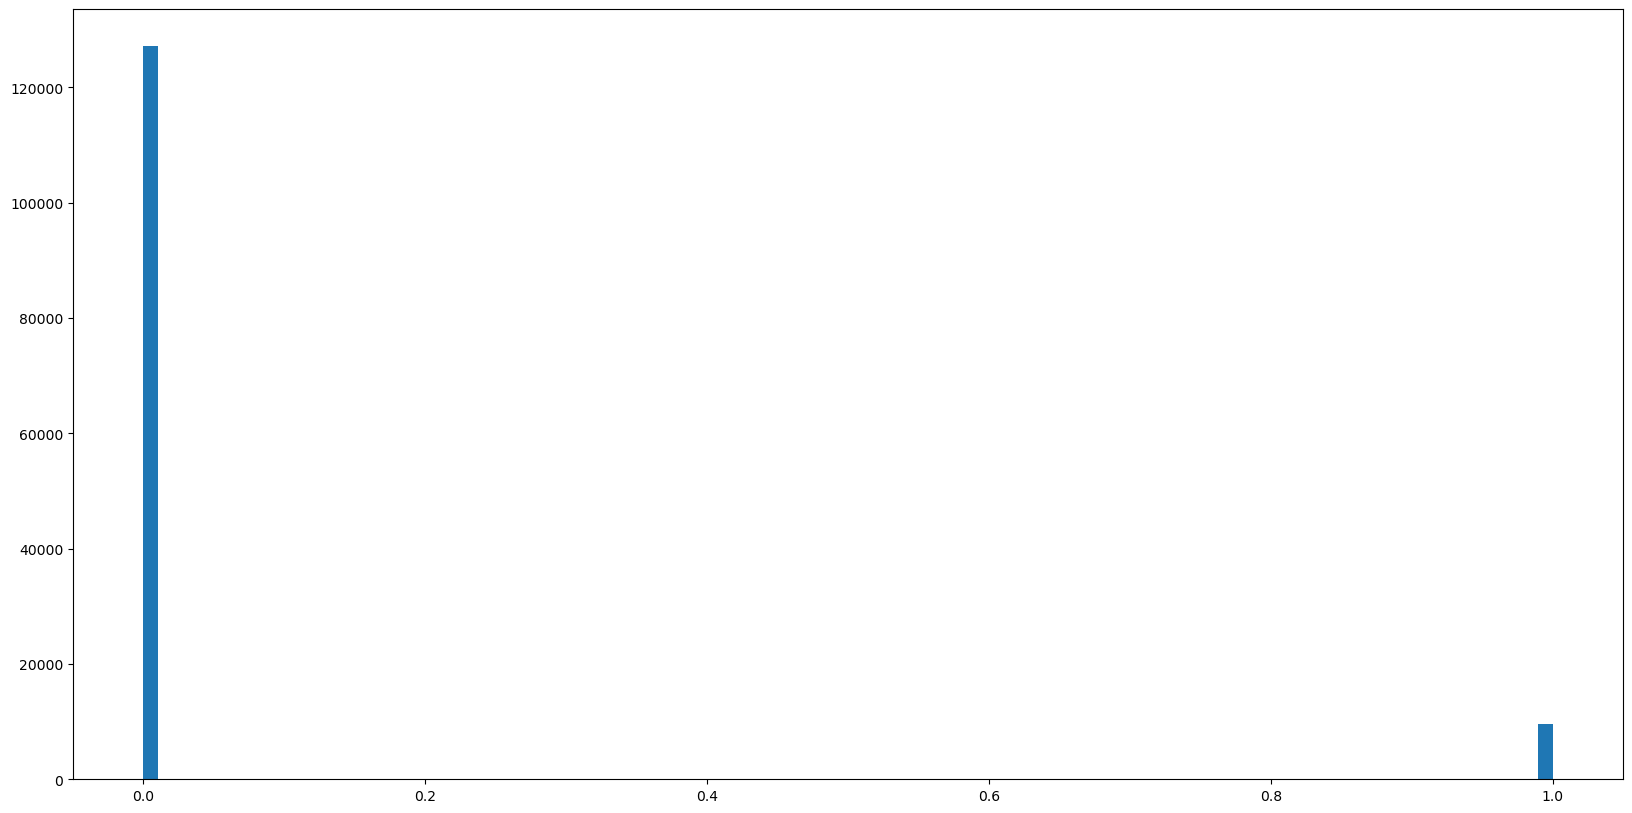

In [16]:
fig = plt.figure(figsize=(20, 10))
plt.hist(y_train.ravel(), bins=100)
plt.show()